<a href="https://colab.research.google.com/github/Alexiagmz/Actividad-7-Reto-Final-/blob/main/Barcelona2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Instalamos librería para análisis de variables categóricas
%pip install funpymodeling

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from funpymodeling.exploratory import freq_tbl

In [ ]:
# Cargar archivo CSV de Barcelona
data = pd.read_csv("listings_Barcelona.csv.gz")
data.head(5)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,269467,https://www.airbnb.com/rooms/269467,20240615011618,2024-06-15,city scrape,Sunny and quiet Loft next to Sagrada Familia,The apartment is a cosy open space with 65 m2....,NaN,https://a0.muscache.com/pictures/a6445a90-94eb...,1411775,...,4.79,4.81,4.67,HUTB-001129,t,3,3,0,0,1.15
1,270197,https://www.airbnb.com/rooms/270197,20240615011618,2024-06-15,city scrape,*monthly stays* 4 Bedroom Apartment near Rambla,Rented only for monthly periods. 4 bedroom apa...,NaN,https://a0.muscache.com/pictures/69907440-d8df...,1414702,...,5.00,5.00,4.50,N/A SOLO ESTANCIAS MENSUALES,f,27,27,0,0,0.02
2,18674,https://www.airbnb.com/rooms/18674,20240615011618,2024-06-15,city scrape,Huge flat for 8 people close to Sagrada Familia,110m2 apartment to rent in Barcelona. Located ...,Apartment in Barcelona located in the heart of...,https://a0.muscache.com/pictures/13031453/413c...,71615,...,4.68,4.78,4.30,HUTB-002062,t,27,27,0,0,0.30
3,272282,https://www.airbnb.com/rooms/272282,20240615011618,2024-06-15,previous scrape,"CHARMING, VERY SPACIOUS & BEST LOCATED",Very spacious apartment located in a modernist...,Eixample is famous for being home to the major...,https://a0.muscache.com/pictures/monet/Select-...,1425070,...,4.96,4.84,4.80,HUTB003208,f,1,1,0,0,2.84
4,23197,https://www.airbnb.com/rooms/23197,20240615011618,2024-06-15,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax","Beautiful spacious apartment, large terrace, 5...","Strategically located in the Parc del Fòrum, a...",https://a0.muscache.com/pictures/miso/Hosting-...,90417,...,4.99,4.62,4.64,HUTB005057,f,1,1,0,0,0.48


In [ ]:
#Elimino las columnas de url
data1= data.drop(["bathrooms","bathrooms_text","bedrooms","beds","neighbourhood","host_location", "host_about",'listing_url','picture_url',"host_url","host_thumbnail_url","host_picture_url","description","neighborhood_overview","license","calendar_updated","has_availability","first_review","last_review"], axis=1)
data1

,id,scrape_id,last_scraped,source,name,host_id,host_name,host_since,host_response_time,host_response_rate,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,269467,20240615011618,2024-06-15,city scrape,Sunny and quiet Loft next to Sagrada Familia,1411775,Jeremies,2011-11-16,within an hour,100%,...,4.83,4.79,4.81,4.67,t,3,3,0,0,1.15
1,270197,20240615011618,2024-06-15,city scrape,*monthly stays* 4 Bedroom Apartment near Rambla,1414702,Ferran,2011-11-16,within an hour,98%,...,5.00,5.00,5.00,4.50,f,27,27,0,0,0.02
2,18674,20240615011618,2024-06-15,city scrape,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,2010-01-19,within an hour,95%,...,4.75,4.68,4.78,4.30,t,27,27,0,0,0.30
3,272282,20240615011618,2024-06-15,previous scrape,"CHARMING, VERY SPACIOUS & BEST LOCATED",1425070,Mar,2011-11-20,NaN,NaN,...,4.94,4.96,4.84,4.80,f,1,1,0,0,2.84
4,23197,20240615011618,2024-06-15,city scrape,"Forum CCIB DeLuxe, Spacious, Large Balcony, relax",90417,Etain (Marnie),2010-03-09,within an hour,100%,...,4.95,4.99,4.62,4.64,f,1,1,0,0,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,1173891409488923931,20240615011618,2024-06-15,city scrape,Friendly apartment near the port,66296022,Suzy,2016-04-08,within an hour,100%,...,NaN,NaN,NaN,NaN,f,51,51,0,0,NaN
18921,1178741129427938140,20240615011618,2024-06-15,city scrape,Paleo - 2 bedrooms and office in Eixample Dreta,346367515,Ukio,2020-05-15,within a few hours,99%,...,NaN,NaN,NaN,NaN,f,406,406,0,0,NaN
18922,1178910876458935142,20240615011618,2024-06-15,city scrape,"Semuc - 2 bedrooms, office and balcony in Eixa...",346367515,Ukio,2020-05-15,within a few hours,99%,...,NaN,NaN,NaN,NaN,f,406,406,0,0,NaN
18923,1173984319228839137,20240615011618,2024-06-15,city scrape,4* room in the center gotico,294265812,Fer,2019-09-12,within an hour,99%,...,NaN,NaN,NaN,NaN,f,18,0,18,0,NaN


In [ ]:
# Limitar numero máximo de filas
pd.options.display.max_rows = None

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18925 entries, 0 to 18924
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18925 non-null  int64  
 1   scrape_id                                     18925 non-null  int64  
 2   last_scraped                                  18925 non-null  object 
 3   source                                        18925 non-null  object 
 4   name                                          18925 non-null  object 
 5   host_id                                       18925 non-null  int64  
 6   host_name                                     18923 non-null  object 
 7   host_since                                    18923 non-null  object 
 8   host_response_time                            16030 non-null  object 
 9   host_response_rate                            16030 non-null 

In [ ]:
#Identificar valores nulos por columna .isnull()
valores_nulos=data1.isnull().sum()
valores_nulos

,0
id,0
scrape_id,0
last_scraped,0
source,0
name,0
host_id,0
host_name,2
host_since,2
host_response_time,2895
host_response_rate,2895


In [ ]:
# Realizar una copia del dataframe original para no modificarlo directamente
data2 = data1.copy()

In [ ]:
# Sustituir valores nulos por "Unknown"
data2['host_response_time']=data2['host_response_time'].fillna('Unknown')
data2['host_acceptance_rate']=data2['host_acceptance_rate'].fillna('Unknown')
data2['host_is_superhost']=data2['host_is_superhost'].fillna('Unknown')
data2['host_response_rate']=data2['host_response_rate'].fillna('Unknown')
data2['host_neighbourhood']=data2['host_neighbourhood'].fillna('Unknown')

In [ ]:
# Convertir la columna 'price' a numérica (quitar símbolos de dólar y convertir a float)
data2['price'] = data2['price'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Sustituir valores nulos en 'price' por la mediana de los precios
data2["price"]=data2["price"].fillna(round(data2["price"].median(),1))

In [ ]:
# Sustituir valores nulos por "no review"
data2['review_scores_rating']=data2['review_scores_rating'].fillna('No review')
data2['reviews_per_month']=data2['reviews_per_month'].fillna('No review')
data2['review_scores_value']=data2['review_scores_rating'].fillna('No review')
data2['review_scores_accuracy']=data2['review_scores_accuracy'].fillna('No review')
data2['review_scores_cleanliness']=data2['review_scores_cleanliness'].fillna('No review')
data2['review_scores_location']=data2['review_scores_location'].fillna('No review')
data2['review_scores_checkin']=data2['review_scores_checkin'].fillna('No review')
data2['review_scores_communication']=data2['review_scores_communication'].fillna('No review')


In [ ]:
# Corroborar que ya no hay valores nulos en el dataframe
valores_nulos=data2.isnull().sum()
valores_nulos

,0
id,0
scrape_id,0
last_scraped,0
source,0
name,0
host_id,0
host_name,2
host_since,2
host_response_time,0
host_response_rate,0


In [ ]:
#Elimina todas filas donde no hay dato
data3 = data2.dropna()

OUTLIERS

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18923 entries, 0 to 18924
Data columns (total 56 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            18923 non-null  int64  
 1   scrape_id                                     18923 non-null  int64  
 2   last_scraped                                  18923 non-null  object 
 3   source                                        18923 non-null  object 
 4   name                                          18923 non-null  object 
 5   host_id                                       18923 non-null  int64  
 6   host_name                                     18923 non-null  object 
 7   host_since                                    18923 non-null  object 
 8   host_response_time                            18923 non-null  object 
 9   host_response_rate                            18923 non-null  obje

In [ ]:
Cualitativas=data3.iloc[:,[8,10,11,22,23,25]]
Cuantitativas=data3.iloc[:,[13,14,24,26,27,28,29,30,31,32,33,34,35,36,37,38,40,41,42,51,52,53,54]]
Otros=data3.iloc[:,[0,1,2,3,4,5,6,7,9,12,15,16,17,18,19,20,21,39,43,44,45,46,47,48,49,50,55]]

<Figure size 2000x800 with 0 Axes>

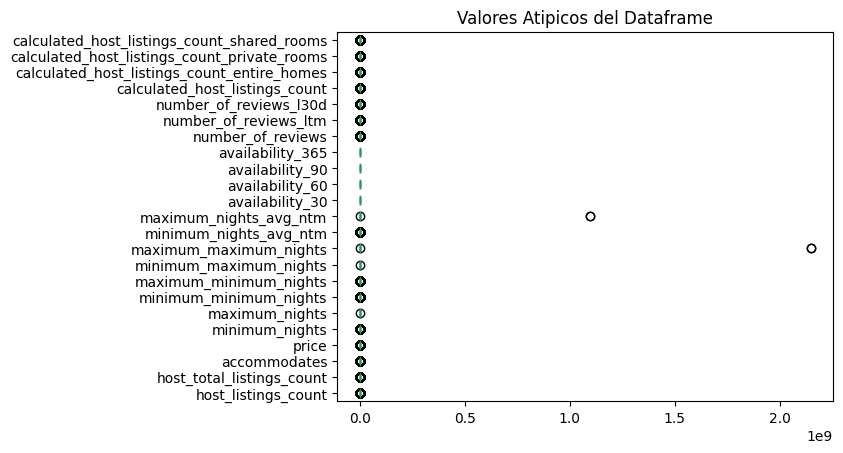

In [ ]:
#Identificación y tratamiento de valores atípicos (outliers)

#Realizamos diagrama de caja y bigote de cada columna del dataframe
fig=plt.figure(figsize=(20,8))
Cuantitativas.plot(kind="box",vert=False)
plt.title("Valores Atipicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:
#Metodo aplicando cuartiles encuentro cuartiles 0.25 y 0.75
y=Cuantitativas

percentile25=y.quantile(0.25) #q1
percentile75=y.quantile(0.75) #q3
iqr=percentile75-percentile25

Limite_Superior= percentile75+1.5*iqr
Limite_Inferior=percentile25-1.5*iqr
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)


Limite superior permitido host_listings_count                               89.5
host_total_listings_count                        130.5
accommodates                                       7.0
price                                            414.5
minimum_nights                                    76.0
maximum_nights                                  2340.0
minimum_minimum_nights                            76.0
maximum_minimum_nights                            73.0
minimum_maximum_nights                          2539.5
maximum_maximum_nights                          2313.0
minimum_nights_avg_ntm                            74.5
maximum_nights_avg_ntm                          2317.5
availability_30                                   32.5
availability_60                                   91.0
availability_90                                  147.5
availability_365                                 597.5
number_of_reviews                                120.0
number_of_reviews_ltm                  

In [ ]:
#Obtenemos datos y los outliners se convierten en nulos en el dataframe
Cuantitativas1=Cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
Cuantitativas1

,host_listings_count,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5.0,7.0,2.0,176.0,7.0,760.0,7.0,7.0,760.0,760.0,...,0,0,257,90.0,17.0,1.0,3.0,3.0,0.0,0.0
1,36.0,112.0,6.0,74.0,32.0,760.0,32.0,32.0,760.0,760.0,...,0,0,0,2.0,0.0,0.0,27.0,27.0,0.0,0.0
2,41.0,45.0,NaN,257.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,...,36,66,177,41.0,5.0,0.0,27.0,27.0,0.0,0.0
3,2.0,2.0,NaN,136.0,4.0,1125.0,3.0,3.0,1125.0,1125.0,...,0,0,0,NaN,32.0,0.0,1.0,1.0,0.0,0.0
4,6.0,13.0,5.0,249.0,3.0,32.0,1.0,7.0,1125.0,1125.0,...,20,38,178,78.0,7.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,53.0,93.0,2.0,86.0,32.0,345.0,32.0,32.0,345.0,345.0,...,58,88,268,0.0,0.0,0.0,51.0,NaN,0.0,0.0
18921,NaN,NaN,4.0,167.0,31.0,330.0,31.0,31.0,330.0,330.0,...,54,84,324,0.0,0.0,0.0,NaN,NaN,0.0,0.0
18922,NaN,NaN,4.0,165.0,31.0,330.0,31.0,31.0,330.0,330.0,...,24,54,294,0.0,0.0,0.0,NaN,NaN,0.0,0.0
18923,24.0,119.0,2.0,44.0,5.0,90.0,5.0,5.0,90.0,90.0,...,1,9,9,0.0,0.0,0.0,18.0,0.0,NaN,0.0


In [ ]:
# Identificar valores nulos por columna después de eliminar outliers
valores_nulos_outliers = Cuantitativas1.isnull().sum()
valores_nulos_outliers

,0
host_listings_count,2926
host_total_listings_count,2989
accommodates,883
price,1176
minimum_nights,190
maximum_nights,1
minimum_minimum_nights,174
maximum_minimum_nights,519
minimum_maximum_nights,1
maximum_maximum_nights,3


In [ ]:
#Reemplazamos valores atípicos (nulos) del df con "mean"
#Realizamos copia del df
Cuantitativas_limpio=Cuantitativas1.copy()
Cuantitativas_limpio=Cuantitativas_limpio.fillna(round(Cuantitativas1.mean(),1))
Cuantitativas_limpio

,host_listings_count,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,5.0,7.0,2.0,176.0,7.0,760.0,7.0,7.0,760.0,760.0,...,0,0,257,90.0,17.0,1.0,3.0,3.0,0.0,0.0
1,36.0,112.0,6.0,74.0,32.0,760.0,32.0,32.0,760.0,760.0,...,0,0,0,2.0,0.0,0.0,27.0,27.0,0.0,0.0
2,41.0,45.0,3.0,257.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,...,36,66,177,41.0,5.0,0.0,27.0,27.0,0.0,0.0
3,2.0,2.0,3.0,136.0,4.0,1125.0,3.0,3.0,1125.0,1125.0,...,0,0,0,18.1,32.0,0.0,1.0,1.0,0.0,0.0
4,6.0,13.0,5.0,249.0,3.0,32.0,1.0,7.0,1125.0,1125.0,...,20,38,178,78.0,7.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,53.0,93.0,2.0,86.0,32.0,345.0,32.0,32.0,345.0,345.0,...,58,88,268,0.0,0.0,0.0,51.0,6.9,0.0,0.0
18921,12.9,18.6,4.0,167.0,31.0,330.0,31.0,31.0,330.0,330.0,...,54,84,324,0.0,0.0,0.0,11.6,6.9,0.0,0.0
18922,12.9,18.6,4.0,165.0,31.0,330.0,31.0,31.0,330.0,330.0,...,24,54,294,0.0,0.0,0.0,11.6,6.9,0.0,0.0
18923,24.0,119.0,2.0,44.0,5.0,90.0,5.0,5.0,90.0,90.0,...,1,9,9,0.0,0.0,0.0,18.0,0.0,0.7,0.0


In [ ]:
# Corroborar valores nulos finales después del tratamiento de outliers
valores_nulos_final = Cuantitativas_limpio.isnull().sum()
valores_nulos_final

,0
host_listings_count,0
host_total_listings_count,0
accommodates,0
price,0
minimum_nights,0
maximum_nights,0
minimum_minimum_nights,0
maximum_minimum_nights,0
minimum_maximum_nights,0
maximum_maximum_nights,0


In [ ]:
Valores_limpios=pd.concat([Cuantitativas_limpio,Cualitativas,Otros],axis=1)
Valores_limpios

,host_listings_count,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,calendar_last_scraped,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,5.0,7.0,2.0,176.0,7.0,760.0,7.0,7.0,760.0,760.0,...,2024-06-15,4.74,4.87,4.59,4.83,4.79,4.81,4.74,t,1.15
1,36.0,112.0,6.0,74.0,32.0,760.0,32.0,32.0,760.0,760.0,...,2024-06-15,4.0,5.0,4.5,5.0,5.0,5.0,4.0,f,0.02
2,41.0,45.0,3.0,257.0,1.0,1125.0,1.0,4.0,1125.0,1125.0,...,2024-06-15,4.35,4.45,4.63,4.75,4.68,4.78,4.35,t,0.3
3,2.0,2.0,3.0,136.0,4.0,1125.0,3.0,3.0,1125.0,1125.0,...,2024-06-15,4.92,4.93,4.97,4.94,4.96,4.84,4.92,f,2.84
4,6.0,13.0,5.0,249.0,3.0,32.0,1.0,7.0,1125.0,1125.0,...,2024-06-15,4.79,4.93,4.89,4.95,4.99,4.62,4.79,f,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18920,53.0,93.0,2.0,86.0,32.0,345.0,32.0,32.0,345.0,345.0,...,2024-06-15,No review,No review,No review,No review,No review,No review,No review,f,No review
18921,12.9,18.6,4.0,167.0,31.0,330.0,31.0,31.0,330.0,330.0,...,2024-06-15,No review,No review,No review,No review,No review,No review,No review,f,No review
18922,12.9,18.6,4.0,165.0,31.0,330.0,31.0,31.0,330.0,330.0,...,2024-06-15,No review,No review,No review,No review,No review,No review,No review,f,No review
18923,24.0,119.0,2.0,44.0,5.0,90.0,5.0,5.0,90.0,90.0,...,2024-06-15,No review,No review,No review,No review,No review,No review,No review,f,No review


In [ ]:
Valores_limpios.to_csv("Valores_Barcelona_limpios2.csv")

ANALISIS UNIVARIADO

In [ ]:
Cualitativas.describe()

,host_response_time,host_acceptance_rate,host_is_superhost,property_type,room_type,amenities
count,18923,18923,18923,18923,18923,18923
unique,5,100,3,59,4,16307
top,within an hour,100%,f,Entire rental unit,Entire home/apt,"[""Cleaning products"", ""Kitchen"", ""Washer"", ""Di..."
freq,10605,4855,15044,9843,11217,140


In [ ]:
#Obtengo un análisis univariado de las variables categóricas
freq_tbl(Cualitativas)

   host_response_time  frequency  percentage  cumulative_perc
0      within an hour      10605    0.560429         0.560429
1  within a few hours       3519    0.185964         0.746393
2             Unknown       2893    0.152883         0.899276
3        within a day       1494    0.078952         0.978228
4  a few days or more        412    0.021772         1.000000

----------------------------------------------------------------

   host_acceptance_rate  frequency  percentage  cumulative_perc
0                  100%       4855    0.256566         0.256566
1               Unknown       2740    0.144797         0.401363
2                   99%       2125    0.112297         0.513661
3                   98%       1241    0.065582         0.579242
4                   97%        790    0.041748         0.620990
..                  ...        ...         ...              ...
95                  61%          2    0.000106         0.999789
96                  24%          1    0.000053   

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table1= freq_tbl(Valores_limpios['host_response_time'])
table1

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,10605,0.560429,0.560429
1,within a few hours,3519,0.185964,0.746393
2,Unknown,2893,0.152883,0.899276
3,within a day,1494,0.078952,0.978228
4,a few days or more,412,0.021772,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
response= table1[table1['percentage']>0.15]
response

,host_response_time,frequency,percentage,cumulative_perc
0,within an hour,10605,0.560429,0.560429
1,within a few hours,3519,0.185964,0.746393
2,Unknown,2893,0.152883,0.899276


In [ ]:
#Ajusto el indice de mi dataframe
response_index= response.set_index('host_response_time')
response_index

,frequency,percentage,cumulative_perc
host_response_time,,,
within an hour,10605,0.560429,0.560429
within a few hours,3519,0.185964,0.746393
Unknown,2893,0.152883,0.899276


In [ ]:
#Elimino las columnas de "frequency" y "cumulative_perc"
response_index_percentage= response_index.drop(['frequency','cumulative_perc'], axis=1)
response_index_percentage

,percentage
host_response_time,
within an hour,0.560429
within a few hours,0.185964
Unknown,0.152883


Text(0, 0.5, 'Porcentaje')

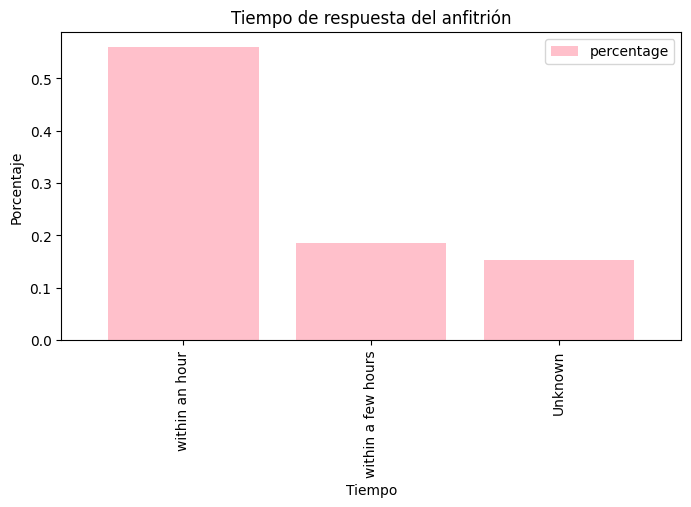

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
response_index_percentage.plot(kind = 'bar', width=0.8, figsize=(8,4),color="pink")
plt.title('Tiempo de respuesta del anfitrión')
plt.xlabel('Tiempo')
plt.ylabel('Porcentaje')

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table2= freq_tbl(Valores_limpios['host_acceptance_rate'])
table2

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,4855,0.256566,0.256566
1,Unknown,2740,0.144797,0.401363
2,99%,2125,0.112297,0.513661
3,98%,1241,0.065582,0.579242
4,97%,790,0.041748,0.620990
...,...,...,...,...
95,61%,2,0.000106,0.999789
96,24%,1,0.000053,0.999841
97,16%,1,0.000053,0.999894
98,4%,1,0.000053,0.999947


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
acceptance= table2[table2['frequency']>=500]
acceptance

,host_acceptance_rate,frequency,percentage,cumulative_perc
0,100%,4855,0.256566,0.256566
1,Unknown,2740,0.144797,0.401363
2,99%,2125,0.112297,0.513661
3,98%,1241,0.065582,0.579242
4,97%,790,0.041748,0.620990
5,56%,544,0.028748,0.649738


In [ ]:
#Ajusto el indice de mi dataframe
acceptance_index= acceptance.set_index('host_acceptance_rate')
acceptance_index

,frequency,percentage,cumulative_perc
host_acceptance_rate,,,
100%,4855,0.256566,0.256566
Unknown,2740,0.144797,0.401363
99%,2125,0.112297,0.513661
98%,1241,0.065582,0.579242
97%,790,0.041748,0.620990
56%,544,0.028748,0.649738


In [ ]:
#Elimino las columnas de "frequency" y "cumulative_perc"
acceptance_index_frequency= acceptance_index.drop(['percentage','cumulative_perc'], axis=1)
acceptance_index_frequency

,frequency
host_acceptance_rate,
100%,4855
Unknown,2740
99%,2125
98%,1241
97%,790
56%,544


Text(0, 0.5, 'Frecuencia')

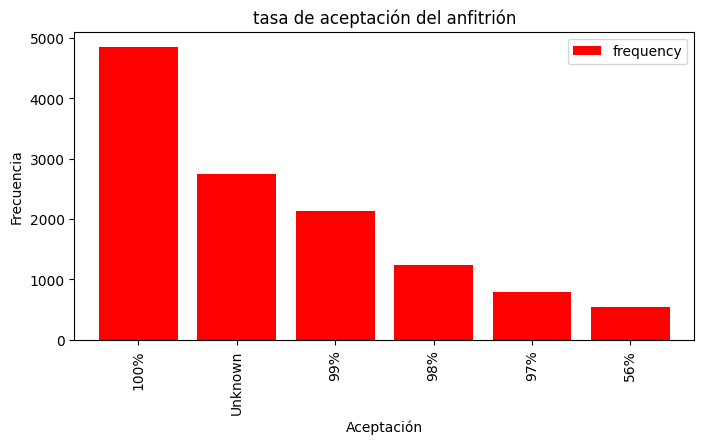

In [ ]:
#Realizamos grafico de barras del dataframe filtrado
acceptance_index_frequency.plot(kind = 'bar', width=0.8, figsize=(8,4),color="red",)
plt.title('tasa de aceptación del anfitrión')
plt.xlabel('Aceptación')
plt.ylabel('Frecuencia')

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table3= freq_tbl(Valores_limpios['property_type'])
table3

,property_type,frequency,percentage,cumulative_perc
0,Entire rental unit,9843,0.520161,0.520161
1,Private room in rental unit,5891,0.311314,0.831475
2,Entire serviced apartment,448,0.023675,0.855150
3,Room in hotel,428,0.022618,0.877768
4,Entire condo,392,0.020716,0.898483
5,Entire loft,289,0.015272,0.913756
6,Private room in condo,233,0.012313,0.926069
7,Private room in hostel,201,0.010622,0.936691
8,Room in boutique hotel,192,0.010146,0.946837
9,Private room in home,188,0.009935,0.956772


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
property= table3[table3['frequency']>=100]
property
#Ajusto el indice de mi dataframe
property_index= property.set_index('property_type')
property_index
#Elimino las columnas de "frequency" y "cumulative_perc"
property_index_frequency= property_index.drop(['percentage','cumulative_perc'], axis=1)
property_index_frequency

,frequency
property_type,
Entire rental unit,9843
Private room in rental unit,5891
Entire serviced apartment,448
Room in hotel,428
Entire condo,392
Entire loft,289
Private room in condo,233
Private room in hostel,201
Room in boutique hotel,192


<Figure size 1000x600 with 0 Axes>

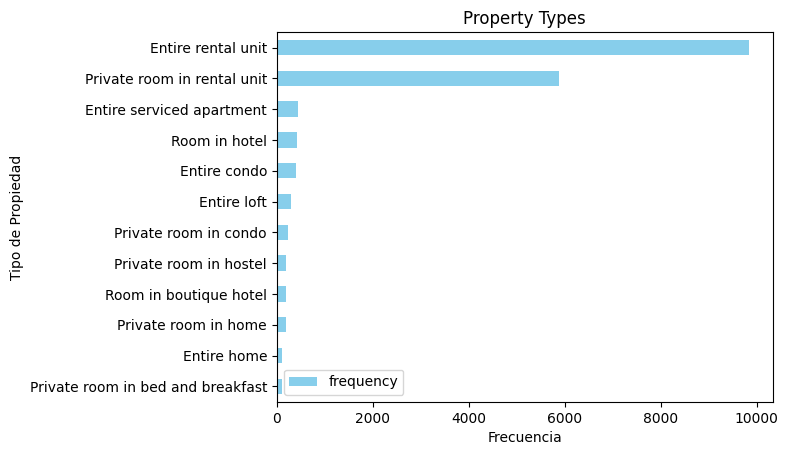

In [ ]:
# Crear el gráfico de barras horizontal
plt.figure(figsize=(10, 6))
property_index_frequency.plot(kind='barh', color='skyblue')
plt.title('Property Types')
plt.xlabel('Frecuencia')
plt.ylabel('Tipo de Propiedad')
plt.gca().invert_yaxis()  # Invertir el eje Y para mostrar la categoría más común en la parte superior
plt.show()


In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table4= freq_tbl(Valores_limpios['room_type'])
table4

,room_type,frequency,percentage,cumulative_perc
0,Entire home/apt,11217,0.592771,0.592771
1,Private room,7434,0.392855,0.985626
2,Shared room,151,0.007980,0.993606
3,Hotel room,121,0.006394,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
type= table4[table4['frequency']>=100]
type
#Ajusto el indice de mi dataframe
type_index=type.set_index('room_type')
type_index
#Elimino las columnas de "frequency" y "cumulative_perc"
type_index_frequency= type_index.drop(['percentage','cumulative_perc'], axis=1)
type_index_frequency

,frequency
room_type,
Entire home/apt,11217
Private room,7434
Shared room,151
Hotel room,121


<Axes: ylabel='frequency'>

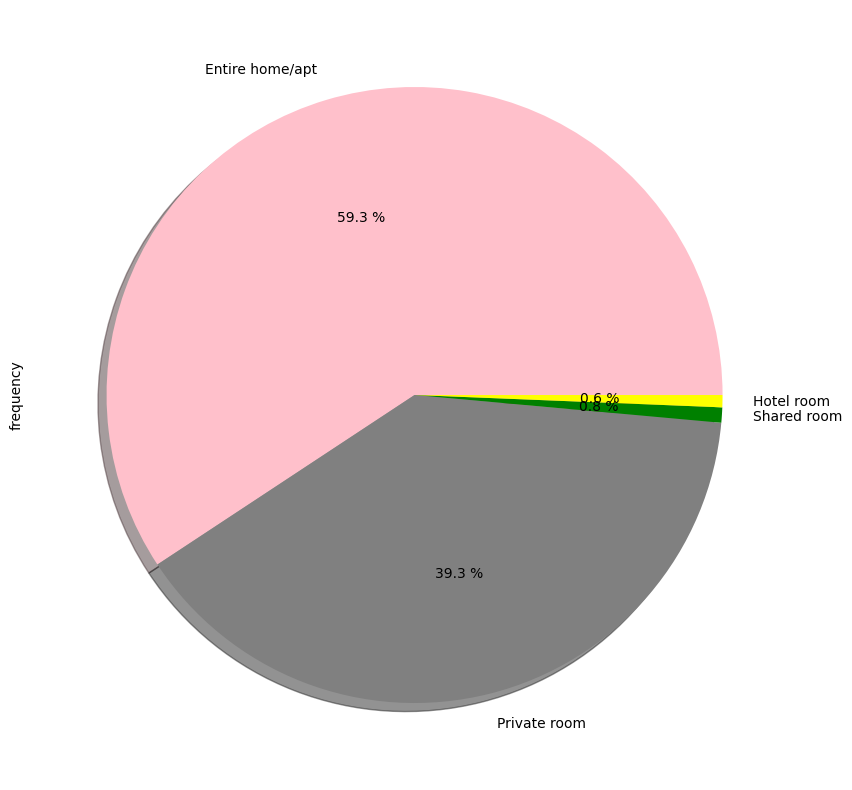

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
type_index_frequency["frequency"].plot(kind='pie', figsize=(10,10), shadow=True, autopct="%0.1f %%",colors=['pink', 'gray', 'green', 'yellow'])

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table5= freq_tbl(Valores_limpios['amenities'])
table5

,amenities,frequency,percentage,cumulative_perc
0,"[""Cleaning products"", ""Kitchen"", ""Washer"", ""Di...",140,0.007398,0.007398
1,"[""Kitchen"", ""Washer"", ""Wifi"", ""Air conditionin...",75,0.003963,0.011362
2,"[""Dedicated workspace"", ""Wifi"", ""Kitchen"", ""Lo...",53,0.002801,0.014163
3,"[""Kitchen"", ""First aid kit"", ""Washer"", ""Wifi"",...",50,0.002642,0.016805
4,"[""Kitchen"", ""Washer"", ""Wifi"", ""Air conditionin...",45,0.002378,0.019183
...,...,...,...,...
16302,"[""Kitchen"", ""Dining table"", ""Host greets you"",...",1,0.000053,0.999789
16303,"[""Free street parking"", ""Kitchen"", ""Host greet...",1,0.000053,0.999841
16304,"[""Kitchen"", ""Dryer"", ""Host greets you"", ""Crib""...",1,0.000053,0.999894
16305,"[""Oven"", ""Kitchen"", ""Cooking basics"", ""Free wa...",1,0.000053,0.999947


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
amenities= table5[table5['frequency']>=10]
amenities
#Ajusto el indice de mi dataframe
amenities_index=amenities.set_index('amenities')
amenities_index
#Elimino las columnas de "frequency" y "cumulative_perc"
amenities_index_frequency= amenities_index.drop(['percentage'], axis=1)
amenities_index_frequency

,frequency,cumulative_perc
amenities,,
"[""Cleaning products"", ""Kitchen"", ""Washer"", ""Dishes and silverware"", ""TV"", ""Wifi"", ""Heating"", ""Dedicated workspace"", ""Hot water""]",140,0.007398
"[""Kitchen"", ""Washer"", ""Wifi"", ""Air conditioning"", ""TV""]",75,0.011362
"[""Dedicated workspace"", ""Wifi"", ""Kitchen"", ""Lock on bedroom door""]",53,0.014163
"[""Kitchen"", ""First aid kit"", ""Washer"", ""Wifi"", ""Lock on bedroom door""]",50,0.016805
"[""Kitchen"", ""Washer"", ""Wifi"", ""Air conditioning"", ""Dedicated workspace"", ""TV""]",45,0.019183
"[""Kitchen"", ""Patio or balcony"", ""Elevator"", ""Crib"", ""Hair dryer"", ""Air conditioning"", ""Long term stays allowed"", ""Washer \u2013\u00a0In unit"", ""Essentials"", ""Cooking basics"", ""Lockbox"", ""Private entrance"", ""Refrigerator"", ""Self check-in"", ""Shampoo"", ""Hangers"", ""Dishwasher"", ""Iron"", ""Bed linens"", ""Wifi"", ""Heating"", ""Hot water"", ""Oven"", ""Microwave"", ""High chair"", ""TV"", ""Pets allowed""]",29,0.020716
[],29,0.022248
"[""Wifi"", ""Washer"", ""Lock on bedroom door"", ""Kitchen""]",23,0.023464
"[""TV"", ""Washer"", ""Kitchen"", ""Wifi""]",22,0.024626


<Axes: xlabel='frequency', ylabel='cumulative_perc'>

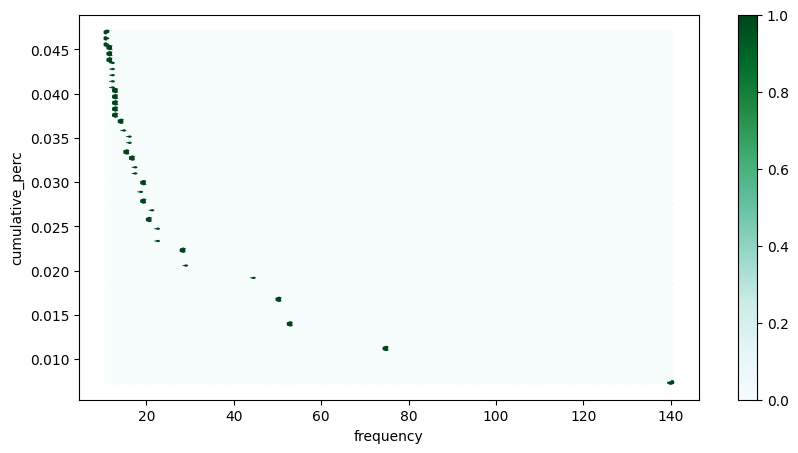

In [ ]:
#Realizamos grafico hexagonal del dataframe filtrado, alternativo al scatter plot
amenities_index_frequency.plot.hexbin("frequency", "cumulative_perc", figsize=(10,5))

In [ ]:
#Obtengo un análisis univariado de una variable categórica en específico
table6= freq_tbl(Valores_limpios['host_is_superhost'])
table6

,host_is_superhost,frequency,percentage,cumulative_perc
0,f,15044,0.795011,0.795011
1,t,3755,0.198436,0.993447
2,Unknown,124,0.006553,1.000000


In [ ]:
#Obtengo un filtro de los valores más reelevantes de la variables categórica seleccionada
host= table6[table6['frequency']>=100]
host
#Ajusto el indice de mi dataframe
host_index=host.set_index('host_is_superhost')
host_index
#Elimino las columnas de "frequency" y "cumulative_perc"
host_index_percentage= host_index.drop(['frequency','cumulative_perc'], axis=1)
host_index_percentage

,percentage
host_is_superhost,
f,0.795011
t,0.198436
Unknown,0.006553


<Axes: ylabel='percentage'>

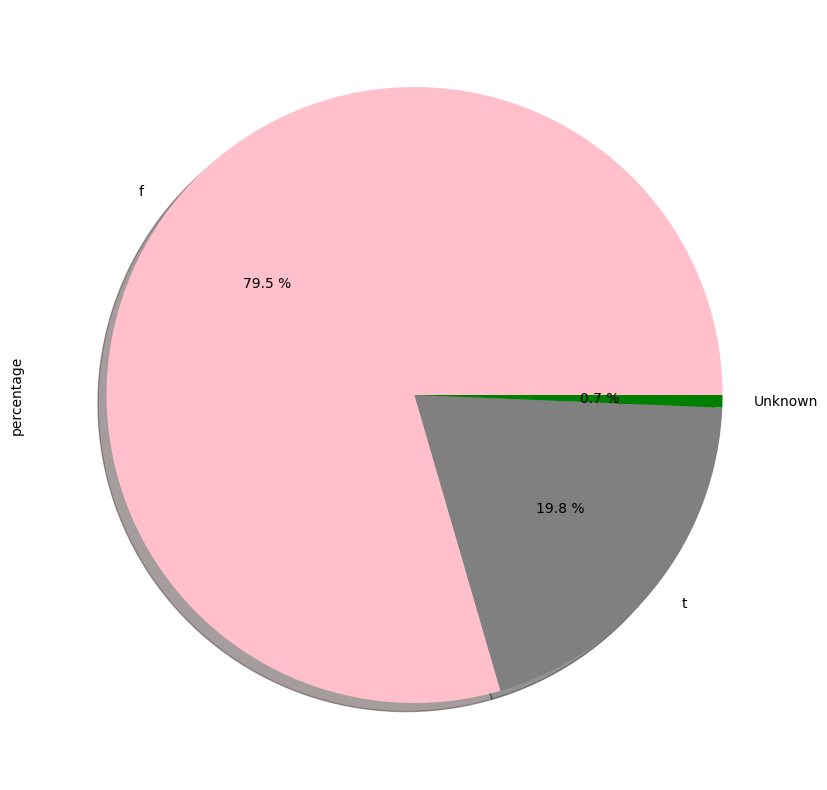

In [ ]:
#Realizamos grafico de pastel del dataframe filtrado
host_index_percentage["percentage"].plot(kind='pie', figsize=(10,10), shadow=True, autopct="%0.1f %%",colors=['pink', 'gray', 'green', 'yellow'])

REGRESION LINEAL

In [97]:
#Encontramos todas las correlaciones entre las variables
Corr_Factors=Cuantitativas.corr()
Corr_Factors

,host_listings_count,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
host_listings_count,1.000000,0.944494,0.057454,0.064406,0.068717,-0.012902,0.104923,0.088117,-0.098657,-0.003874,...,-0.004530,0.029955,0.212097,-0.123519,-0.099294,-0.106525,0.934171,0.839947,0.384991,-0.020438
host_total_listings_count,0.944494,1.000000,0.086125,0.078755,0.059166,0.005738,0.093372,0.077686,-0.098884,-0.004040,...,0.029591,0.058173,0.223843,-0.132216,-0.106152,-0.111870,0.883788,0.784022,0.379158,-0.024447
accommodates,0.057454,0.086125,1.000000,0.390969,-0.118939,0.103458,-0.113546,-0.056256,0.073598,0.003164,...,0.043363,0.074365,0.153523,0.173712,0.148827,0.098958,0.045627,0.207701,-0.212769,-0.024649
price,0.064406,0.078755,0.390969,1.000000,-0.112127,0.048737,-0.113447,-0.083983,0.016230,0.010185,...,0.102466,0.105635,0.070902,0.077352,0.071007,0.041094,0.037626,0.098105,-0.073825,-0.022335
minimum_nights,0.068717,0.059166,-0.118939,-0.112127,1.000000,-0.036008,0.890552,0.663189,0.002823,-0.004593,...,0.020301,0.020775,0.065773,-0.140908,-0.166051,-0.157932,0.075601,0.018817,0.099523,0.034786
maximum_nights,-0.012902,0.005738,0.103458,0.048737,-0.036008,1.000000,-0.033025,0.032579,0.559495,0.014142,...,-0.028685,-0.032625,0.065323,0.090600,0.029982,-0.017414,-0.018406,0.037298,-0.084376,0.058810
minimum_minimum_nights,0.104923,0.093372,-0.113546,-0.113447,0.890552,-0.033025,1.000000,0.687563,0.006417,-0.004578,...,0.015292,0.014502,0.064312,-0.160006,-0.186767,-0.179993,0.109973,0.052028,0.111116,-0.010529
maximum_minimum_nights,0.088117,0.077686,-0.056256,-0.083983,0.663189,0.032579,0.687563,1.000000,0.052270,-0.003423,...,0.000792,0.006153,0.061305,-0.135519,-0.152068,-0.145531,0.109366,0.096284,0.048348,-0.020264
minimum_maximum_nights,-0.098657,-0.098884,0.073598,0.016230,0.002823,0.559495,0.006417,0.052270,1.000000,-0.012440,...,-0.102113,-0.102300,-0.016973,0.124261,0.031948,-0.009731,-0.100332,-0.052417,-0.094175,0.022477
maximum_maximum_nights,-0.003874,-0.004040,0.003164,0.010185,-0.004593,0.014142,-0.004578,-0.003423,-0.012440,1.000000,...,0.008980,0.009138,0.007349,0.017689,0.013393,0.001887,-0.003993,-0.003095,-0.002306,-0.001170


In [98]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,host_listings_count,host_total_listings_count,accommodates,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
host_listings_count,1.000000,0.944494,0.057454,0.064406,0.068717,0.012902,0.104923,0.088117,0.098657,0.003874,...,0.004530,0.029955,0.212097,0.123519,0.099294,0.106525,0.934171,0.839947,0.384991,0.020438
host_total_listings_count,0.944494,1.000000,0.086125,0.078755,0.059166,0.005738,0.093372,0.077686,0.098884,0.004040,...,0.029591,0.058173,0.223843,0.132216,0.106152,0.111870,0.883788,0.784022,0.379158,0.024447
accommodates,0.057454,0.086125,1.000000,0.390969,0.118939,0.103458,0.113546,0.056256,0.073598,0.003164,...,0.043363,0.074365,0.153523,0.173712,0.148827,0.098958,0.045627,0.207701,0.212769,0.024649
price,0.064406,0.078755,0.390969,1.000000,0.112127,0.048737,0.113447,0.083983,0.016230,0.010185,...,0.102466,0.105635,0.070902,0.077352,0.071007,0.041094,0.037626,0.098105,0.073825,0.022335
minimum_nights,0.068717,0.059166,0.118939,0.112127,1.000000,0.036008,0.890552,0.663189,0.002823,0.004593,...,0.020301,0.020775,0.065773,0.140908,0.166051,0.157932,0.075601,0.018817,0.099523,0.034786
maximum_nights,0.012902,0.005738,0.103458,0.048737,0.036008,1.000000,0.033025,0.032579,0.559495,0.014142,...,0.028685,0.032625,0.065323,0.090600,0.029982,0.017414,0.018406,0.037298,0.084376,0.058810
minimum_minimum_nights,0.104923,0.093372,0.113546,0.113447,0.890552,0.033025,1.000000,0.687563,0.006417,0.004578,...,0.015292,0.014502,0.064312,0.160006,0.186767,0.179993,0.109973,0.052028,0.111116,0.010529
maximum_minimum_nights,0.088117,0.077686,0.056256,0.083983,0.663189,0.032579,0.687563,1.000000,0.052270,0.003423,...,0.000792,0.006153,0.061305,0.135519,0.152068,0.145531,0.109366,0.096284,0.048348,0.020264
minimum_maximum_nights,0.098657,0.098884,0.073598,0.016230,0.002823,0.559495,0.006417,0.052270,1.000000,0.012440,...,0.102113,0.102300,0.016973,0.124261,0.031948,0.009731,0.100332,0.052417,0.094175,0.022477
maximum_maximum_nights,0.003874,0.004040,0.003164,0.010185,0.004593,0.014142,0.004578,0.003423,0.012440,1.000000,...,0.008980,0.009138,0.007349,0.017689,0.013393,0.001887,0.003993,0.003095,0.002306,0.001170


<Axes: >

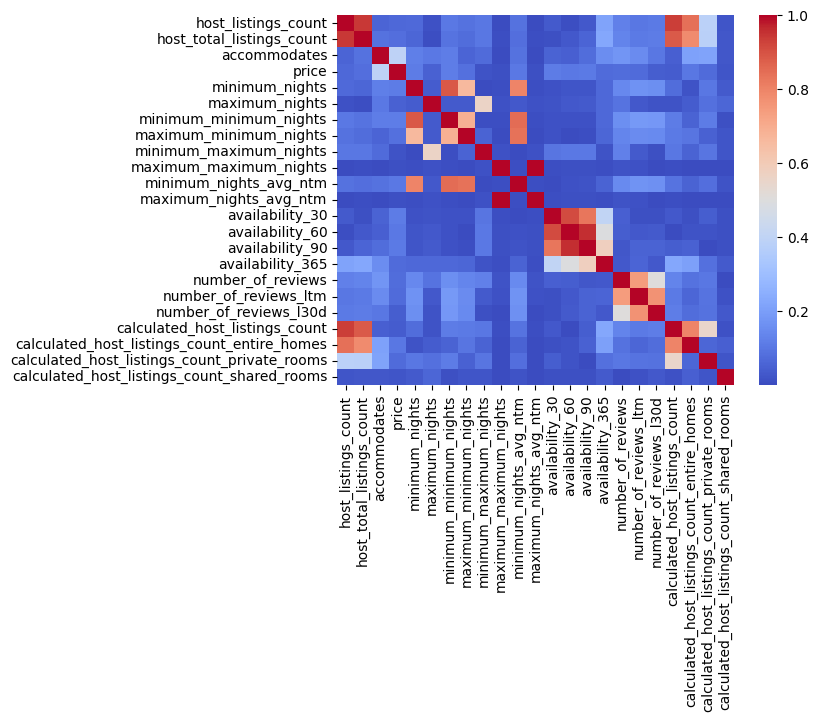

In [99]:
#Graficamos el mapa de calor de los coeficientes de correlación
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'coolwarm')
Heat_Map